# Atividade Regressão Linear

Rhenan Dias Morais - GU3009254

### Importando a biblioteca Seaborn e a base da dados "Iris"

In [36]:
import seaborn as sns

In [37]:
iris = sns.load_dataset('iris')

In [38]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [39]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Plotando gráfico de Scatter Plot Matrix com os dados

In [40]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

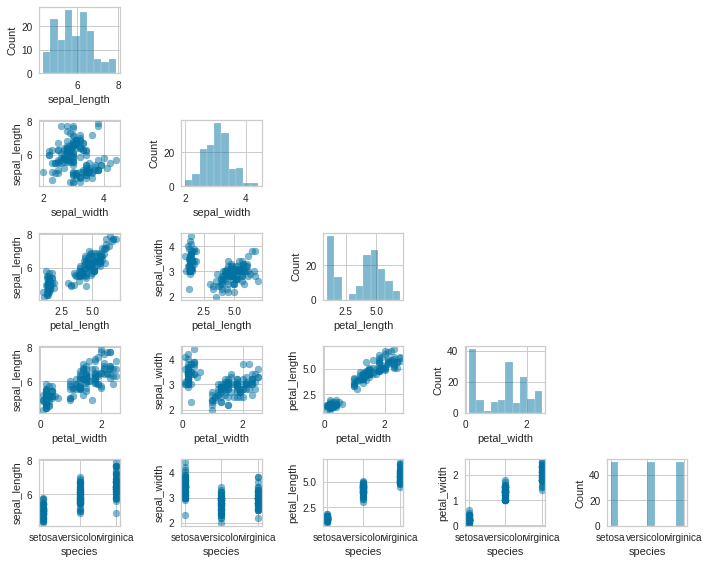

In [41]:
# Plot para visualizar o espalhamento dos dados
scatterplotmatrix(iris.values, figsize=(10, 8), names=iris.columns, alpha=0.5)
plt.tight_layout()
plt.show()

### Plotando gráfico de Pairplot

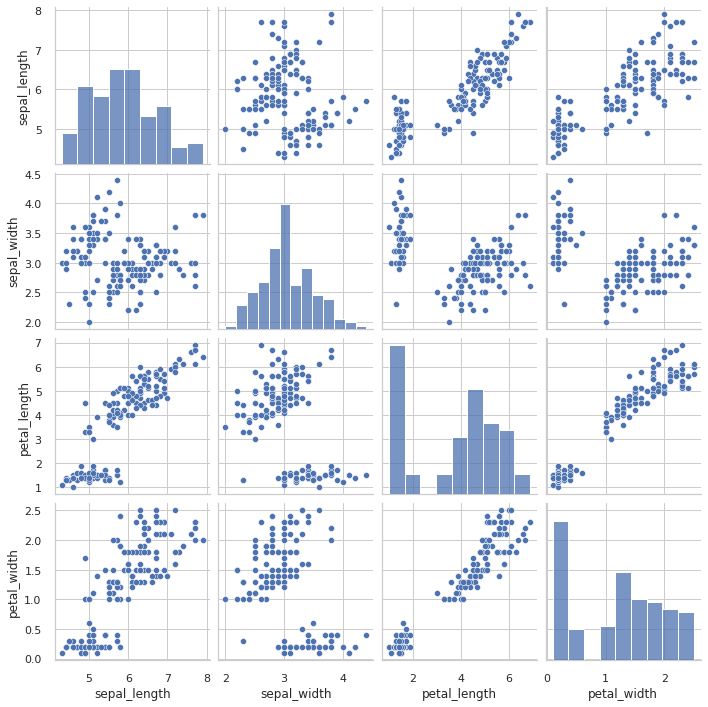

In [42]:
sns.set(style='whitegrid', context='notebook')
cols = iris.columns
sns.pairplot(iris, height=2.5)
plt.show()

### Plotando gráfico de Heat Map

Assim é possível ver o gráu de correlação entre os dados. 
A diagonal principal da matriz é os dados que são considerados os que o modelo acertou 

<AxesSubplot:>

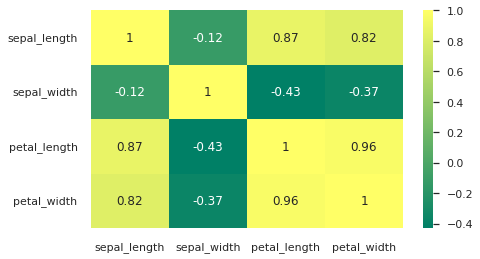

In [43]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,cmap='summer')

### Dividindo os dados em conjunto de treinamento e teste

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import (ensemble,model_selection,preprocessing,tree,)
from sklearn.metrics import (auc,confusion_matrix,roc_auc_score,roc_curve,)
from sklearn.model_selection import( train_test_split,StratifiedKFold,)
from yellowbrick.classifier import (ConfusionMatrix,ROCAUC,)
from yellowbrick.model_selection import (LearningCurve,)
import janitor as jn

X, y = jn.get_features_targets(iris, target_columns='petal_width')
X_treino, X_test, Y_treino, Y_test = model_selection.train_test_split(X, y,
test_size=0.3, random_state=42)

print(X_treino)

     sepal_length  sepal_width  petal_length     species
81            5.5          2.4           3.7  versicolor
133           6.3          2.8           5.1   virginica
137           6.4          3.1           5.5   virginica
75            6.6          3.0           4.4  versicolor
109           7.2          3.6           6.1   virginica
..            ...          ...           ...         ...
71            6.1          2.8           4.0  versicolor
106           4.9          2.5           4.5   virginica
14            5.8          4.0           1.2      setosa
92            5.8          2.6           4.0  versicolor
102           7.1          3.0           5.9   virginica

[105 rows x 4 columns]


/usr/local/lib/python3.8/dist-packages/janitor/utils.py:290: FutureWarning: get_features_targets() has moved. Please use ml.get_features_targets().
  warnings.warn(message, FutureWarning)


### Função de execução de Regressão Linear

In [45]:
import numpy as np

class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

### Realizando Regressão Linear

In [46]:
X = iris[["petal_length"]].values
Y = iris["petal_width"].values

In [47]:
# Ele padroniza a distribuição dos dados
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(Y[:,np.newaxis]).flatten()

In [48]:
# Chamando a classe de Regressão Linear, criada acima
lr = LinearRegressionGD()
lr.fit(x_std, y_std)

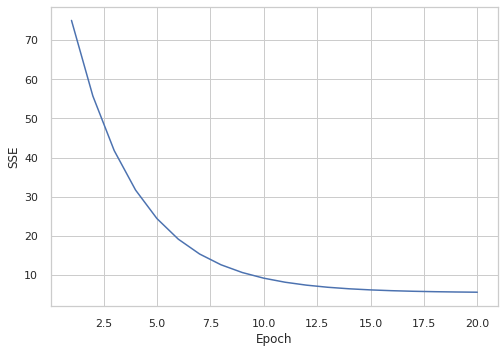

In [49]:
# Plot 
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

### Criação do gráfico de regressão linear obtido

In [50]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    
    return

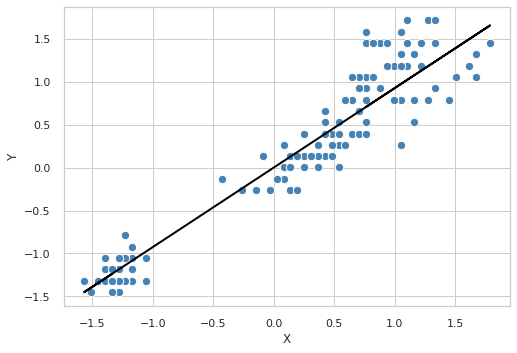

In [51]:
# Plotando a regressão linear 
lin_regplot(x_std, y_std, lr)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()